## Regression - Supervised Learning - Denetimli Öğretim

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns        
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
# ihtiyacımız olan paketleri import ettik 

In [2]:
df = pd.read_csv("train.csv")

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
df.sample(5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
720,721,537738,823031,2,115870,3,6,12,137,77,111,221132.5
236,237,600873,718675,5,91204,5,5,15,183,76,133,296829.0
327,328,593508,899797,3,56201,5,6,11,144,84,115,527409.5
527,528,616858,777197,7,95246,4,2,8,193,75,85,308376.5
269,270,614371,898435,7,52712,5,7,13,136,91,125,547378.0


In [10]:
df["rating"].unique(),df["rating"].value_counts(),

(array([1, 5, 2, 4, 3], dtype=int64),
 4    209
 3    204
 1    201
 2    197
 5    189
 Name: rating, dtype: int64,
 <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002A14F526F10>)

In [13]:
df.groupby("rating")["top speed"].count()

rating
1    201
2    197
3    204
4    209
5    189
Name: top speed, dtype: int64

In [7]:
abs(df.corr()["current price"]).sort_values(ascending=False)   

current price    1.000000
km               0.935924
on road now      0.282793
on road old      0.233035
condition        0.110108
v.id             0.059460
rating           0.035038
economy          0.034711
hp               0.030238
top speed        0.027993
years            0.011854
torque           0.002290
Name: current price, dtype: float64

In [14]:
df.drop('v.id',axis=1,inplace=True)

In [16]:
df[df["current price"]>60000] 

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [17]:
df.shape

(1000, 11)

<AxesSubplot:>

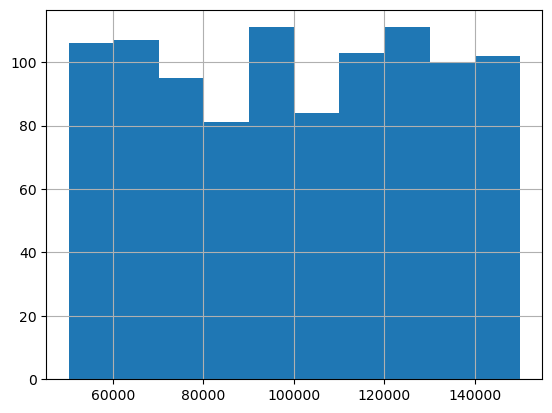

In [18]:
df.km.hist()            # aracın km dağılımı 

<AxesSubplot:>

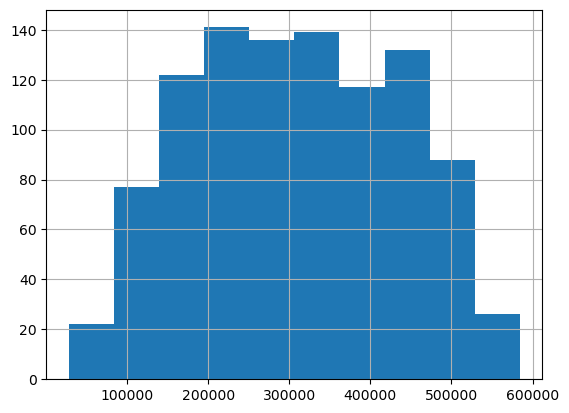

In [19]:
df['current price'].hist()           # aracın fiyat dağılımı 

In [20]:
df.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   on road old    1000 non-null   int64  
 1   on road now    1000 non-null   int64  
 2   years          1000 non-null   int64  
 3   km             1000 non-null   int64  
 4   rating         1000 non-null   int64  
 5   condition      1000 non-null   int64  
 6   economy        1000 non-null   int64  
 7   top speed      1000 non-null   int64  
 8   hp             1000 non-null   int64  
 9   torque         1000 non-null   int64  
 10  current price  1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [22]:
df.isnull().sum()

on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [23]:
df.corr()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
on road old,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238
torque,0.008950,0.017955,0.028859,0.013566,0.004408,0.047805,0.041632,-0.019697,-0.013817,1.000000,-0.002290


<AxesSubplot:>

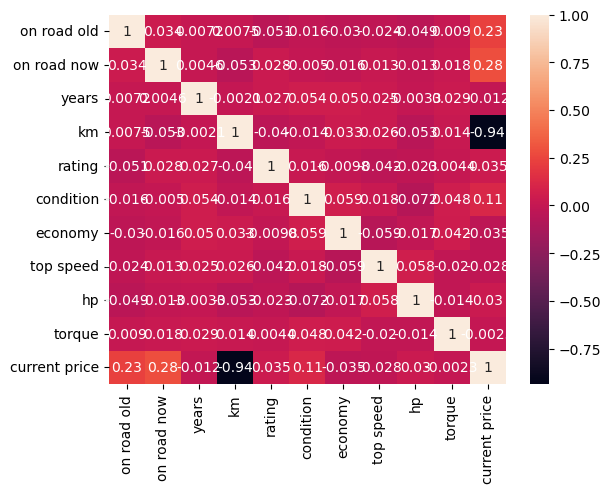

In [24]:
sns.heatmap(df.corr(), annot = True)

In [16]:
# Korelasyon 0.90 dan büyükse muhtemelen veri başka bir formda kendisini tekrar etmiştir. 

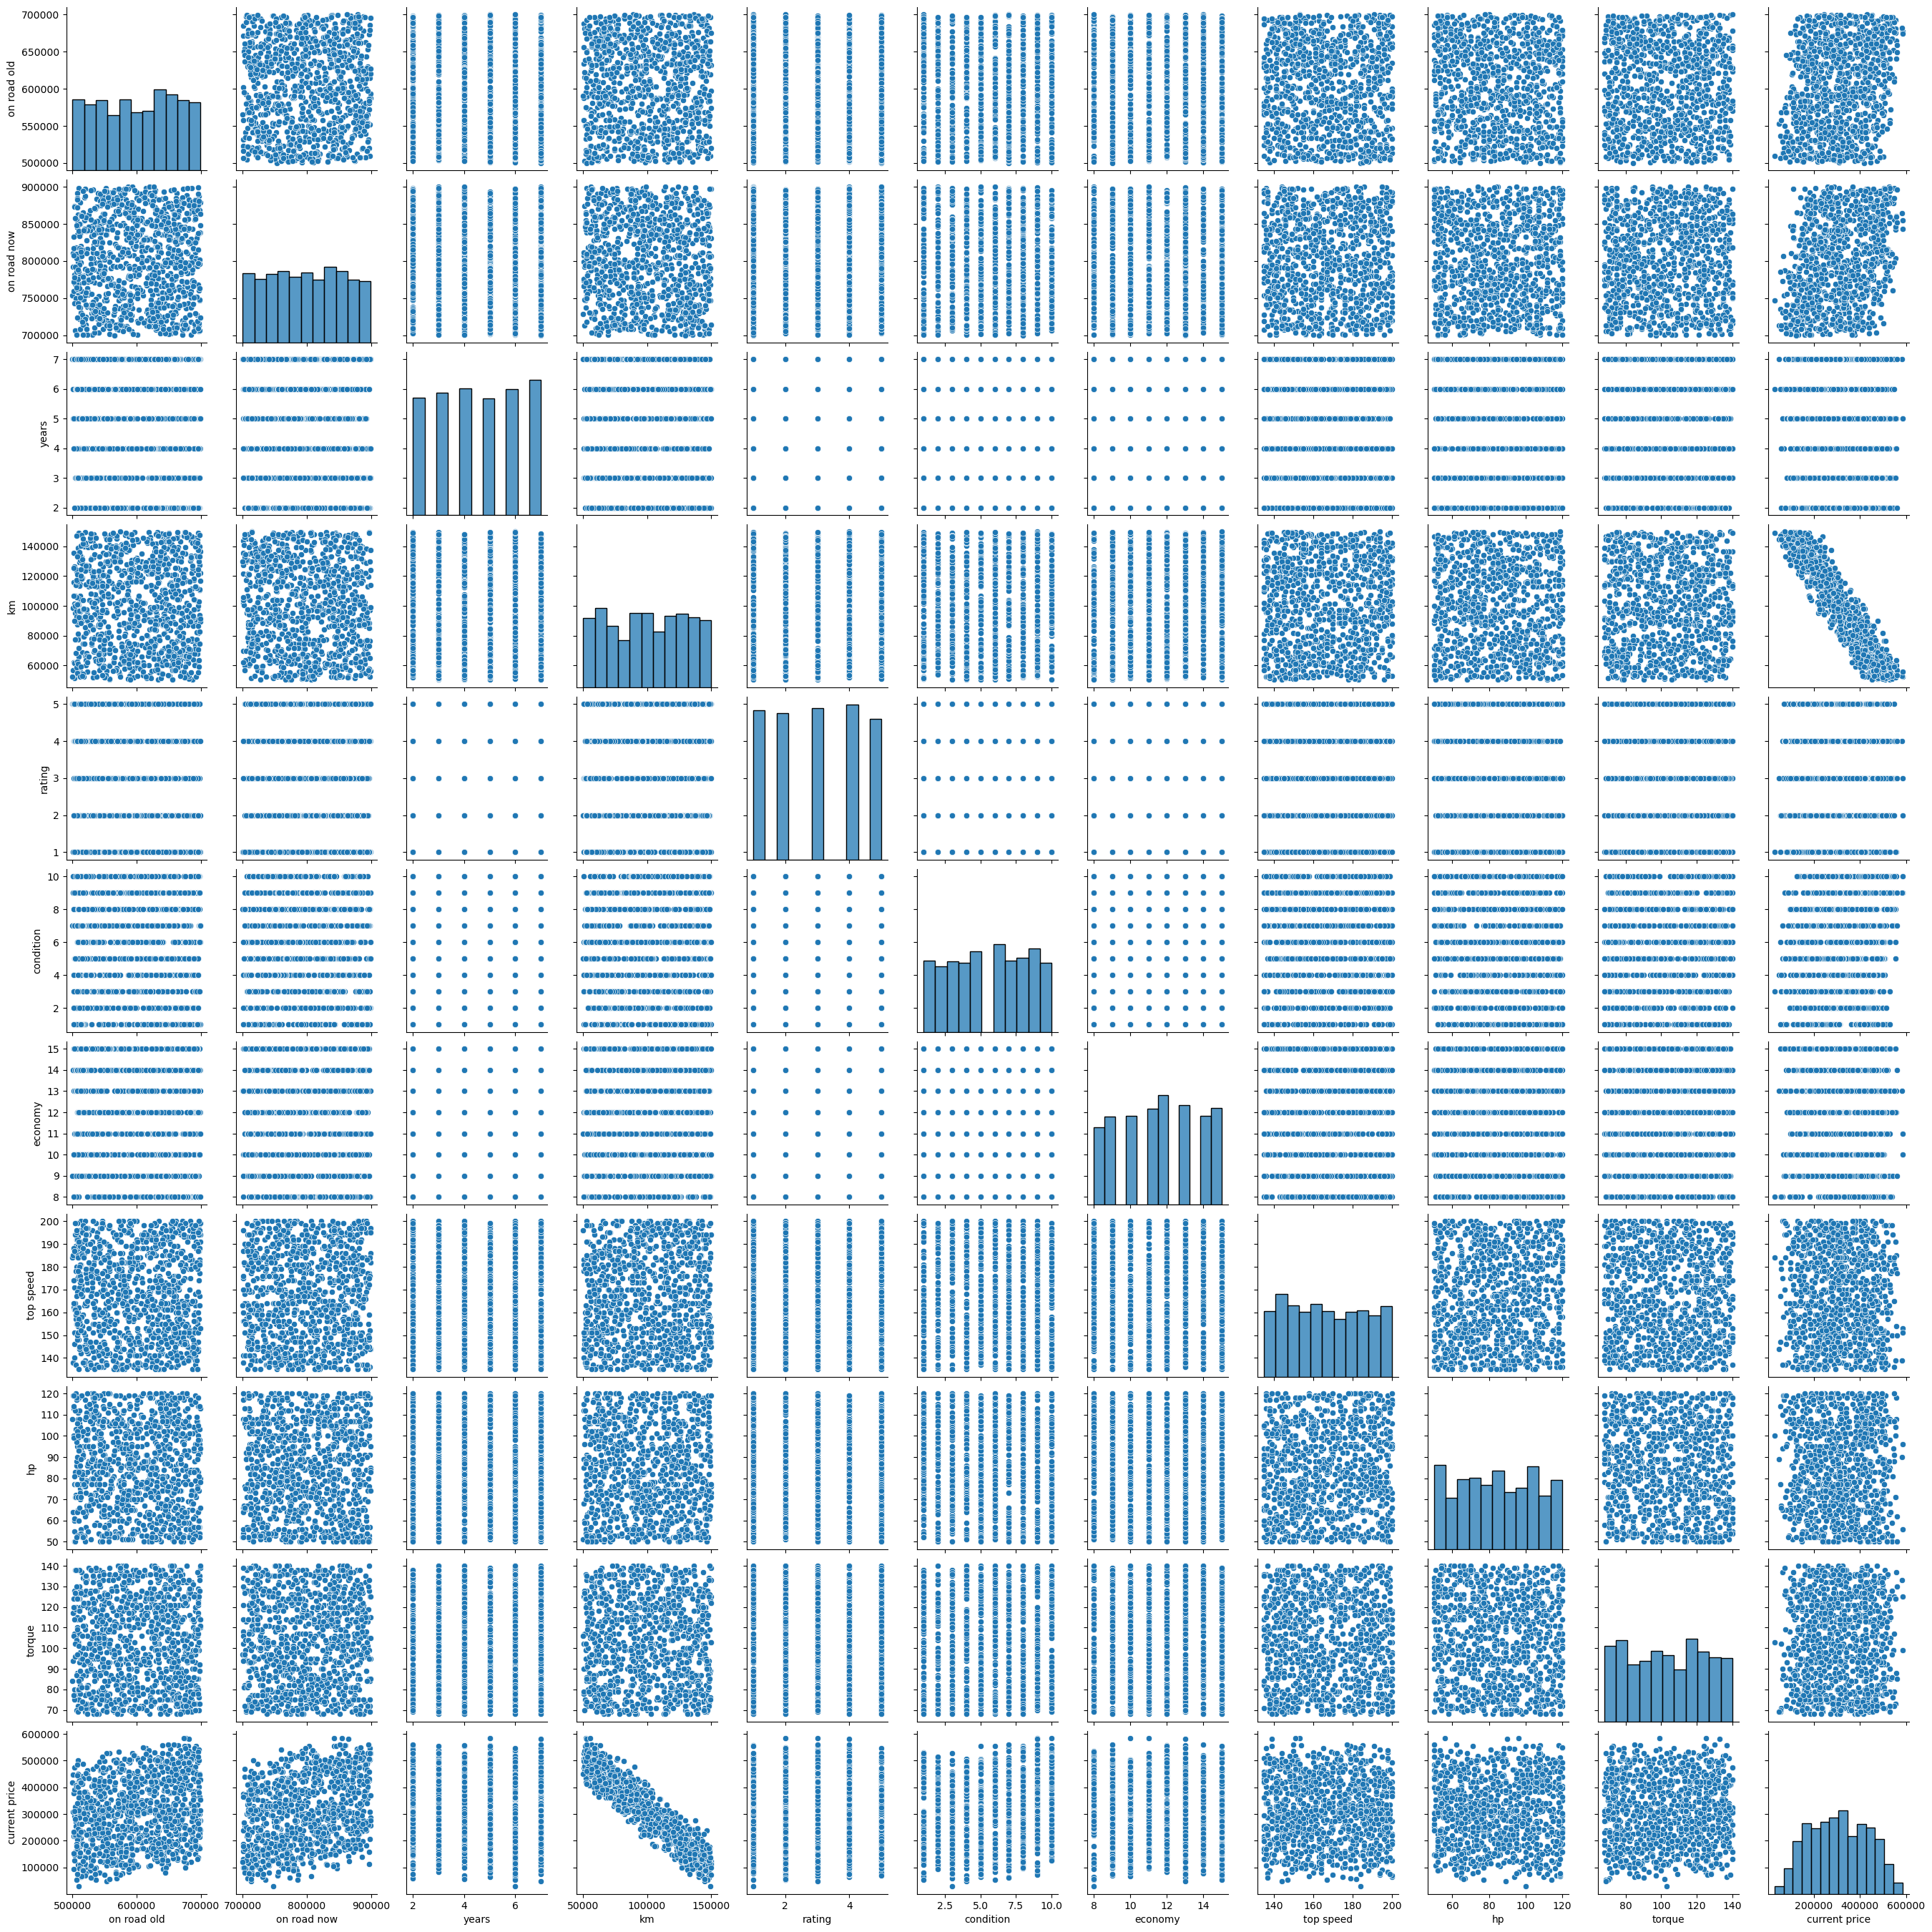

In [25]:
sns.pairplot(df);

### Modelling 

In [26]:
x = df.drop('current price',axis=1)

In [27]:
x.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95
2,686990,770762,2,132538,2,8,15,181,53,97
3,573999,722381,4,101065,4,3,11,197,54,116
4,691388,811335,6,61559,3,9,12,160,53,105


In [28]:
y = df['current price']        # fiyatı y ye eşitledik çünkü y yi tahmin etmek istiyoruz. 

In [29]:
y

0      351318.0
1      285001.5
2      215386.0
3      244295.5
4      531114.5
         ...   
995    190744.0
996    419748.0
997    405871.0
998     74398.0
999    414938.5
Name: current price, Length: 1000, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression      # Paketleri import ettik
from sklearn.model_selection import train_test_split   # "train_test_split" veriyi ikiye ayırır. eğitir sonra test eder

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state=42)  # bu verileri al ikiye böl eğit test et demiş oluyoruz. " test_size =0.20" ise bize test için verinin yüzde 20 sini kullandıracağımızı söyler. "random_state = 42" ise 42 yi baz alarak yeni rakamlar ürettiği için refresh te yapsak sürekli aynı random seriyi seçtiği için seçilen veri değişmemiş olur, örneklem grubu değişmemiş oluyor. (genelde 42 kullanılırmış.)  

In [32]:
x_train.shape       # verinin yüzde 80 i 643 ünü eğitmek için ayırdığını görüyoruz. 

(800, 10)

In [33]:
x_train               # Rastgele seçildiğini görüyoruz. 

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
29,503327,873403,7,101416,3,8,9,171,77,128
535,539063,853655,5,95921,2,9,15,195,101,96
695,647186,834325,3,60666,4,1,9,146,107,125
557,602944,734207,7,117240,4,9,15,148,73,77
836,519091,843455,3,74762,2,5,10,138,76,73
...,...,...,...,...,...,...,...,...,...,...
106,519909,789003,4,66514,3,10,13,139,50,69
270,627918,872779,5,78154,5,6,10,165,100,124
860,630255,768636,2,136449,2,6,15,192,120,136
435,652175,756878,3,96686,5,4,10,190,115,140


In [34]:
lr = LinearRegression()     # lr yi LinearRegression a eşitledik. 

In [35]:
model = lr.fit(x_train,y_train)       # Modeli hazıladı. İşte bu makine öğrenmesi. Fit dedik öğrendi. 

In [36]:
tahmin = model.predict(x_test)       # Predict dedik tahmin etti. 

In [37]:
from sklearn.metrics import mean_squared_error, r2_score       # Mean squared error e ve R2 scor una bakmak için import ediyoruz.

In [38]:
(mean_squared_error(tahmin, y_test))**.5       # **.5 yaparak kare kökünü alıyoruz. Mean squared error u bulduk. Yani tahmin edilenle gerçek olan fiyat arasındaki farkı bulduk.   

9001.717097556428

In [39]:
r2_score(tahmin, y_test)                   # r2 score unu bulduk 

0.995147360079085

In [40]:
from sklearn.linear_model import Ridge, Lasso       # Ridge ve Lasso regresyon algoritmalarını ekledik. veriyi farklı 2 algoritmayla tahmin etmek için.  

In [41]:
R = Ridge()
L = Lasso()

In [42]:
R.fit(x_train, y_train)
tahmin2 = R.predict(x_test)

In [43]:
L.fit(x_train, y_train)
tahmin3 = L.predict(x_test)

In [44]:
(mean_squared_error(tahmin2, y_test))**.5   # tahmin 2 için

9001.671625805158

In [45]:
r2_score(tahmin2, y_test)          # tahmin 2 için

0.9951473931495551

In [46]:
(mean_squared_error(tahmin3, y_test))**.5        # tahmin 2 için

9001.67030819203

In [47]:
r2_score(tahmin3, y_test)                    # tahmin 2 için

0.9951474091406098

In [48]:
from sklearn.linear_model import ElasticNet              # elastic-net regression u import ettik.

In [49]:
E = ElasticNet()

In [50]:
E.fit(x_train, y_train)
tahmin4 = E.predict(x_test) 

In [51]:
(mean_squared_error(tahmin4, y_test))**.5

9036.904927124637

In [52]:
r2_score(tahmin4, y_test)

0.9951036204343494

In [54]:
model = Sequential()
model.add(Dense(245,activation='relu'))
model.add(Dense(270,activation='relu'))
model.add(Dense(270,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [56]:
history=model.fit(x_train,y_train,batch_size=15,epochs=500,validation_split=0.20,verbose=2)
model.summary()

Epoch 1/500
43/43 - 1s - loss: 59190059008.0000 - val_loss: 15744204800.0000 - 901ms/epoch - 21ms/step
Epoch 2/500
43/43 - 0s - loss: 14557115392.0000 - val_loss: 15420527616.0000 - 92ms/epoch - 2ms/step
Epoch 3/500
43/43 - 0s - loss: 14363052032.0000 - val_loss: 13324006400.0000 - 90ms/epoch - 2ms/step
Epoch 4/500
43/43 - 0s - loss: 11869771776.0000 - val_loss: 10316398592.0000 - 89ms/epoch - 2ms/step
Epoch 5/500
43/43 - 0s - loss: 7291179008.0000 - val_loss: 3834422528.0000 - 88ms/epoch - 2ms/step
Epoch 6/500
43/43 - 0s - loss: 1441107072.0000 - val_loss: 596840704.0000 - 89ms/epoch - 2ms/step
Epoch 7/500
43/43 - 0s - loss: 369322112.0000 - val_loss: 315976800.0000 - 92ms/epoch - 2ms/step
Epoch 8/500
43/43 - 0s - loss: 328291904.0000 - val_loss: 520840800.0000 - 86ms/epoch - 2ms/step
Epoch 9/500
43/43 - 0s - loss: 420710848.0000 - val_loss: 451237632.0000 - 94ms/epoch - 2ms/step
Epoch 10/500
43/43 - 0s - loss: 334066560.0000 - val_loss: 220847536.0000 - 104ms/epoch - 2ms/step
Epoch 1

Epoch 85/500
43/43 - 0s - loss: 412172224.0000 - val_loss: 217081040.0000 - 92ms/epoch - 2ms/step
Epoch 86/500
43/43 - 0s - loss: 302773952.0000 - val_loss: 226282464.0000 - 87ms/epoch - 2ms/step
Epoch 87/500
43/43 - 0s - loss: 288216128.0000 - val_loss: 243767120.0000 - 97ms/epoch - 2ms/step
Epoch 88/500
43/43 - 0s - loss: 303693600.0000 - val_loss: 216494848.0000 - 92ms/epoch - 2ms/step
Epoch 89/500
43/43 - 0s - loss: 321022080.0000 - val_loss: 250921760.0000 - 116ms/epoch - 3ms/step
Epoch 90/500
43/43 - 0s - loss: 327160704.0000 - val_loss: 312727552.0000 - 102ms/epoch - 2ms/step
Epoch 91/500
43/43 - 0s - loss: 313372256.0000 - val_loss: 208383504.0000 - 98ms/epoch - 2ms/step
Epoch 92/500
43/43 - 0s - loss: 286778816.0000 - val_loss: 292339488.0000 - 101ms/epoch - 2ms/step
Epoch 93/500
43/43 - 0s - loss: 307841888.0000 - val_loss: 413510464.0000 - 80ms/epoch - 2ms/step
Epoch 94/500
43/43 - 0s - loss: 319486976.0000 - val_loss: 443885664.0000 - 79ms/epoch - 2ms/step
Epoch 95/500
43/4

Epoch 168/500
43/43 - 0s - loss: 333889792.0000 - val_loss: 215446656.0000 - 83ms/epoch - 2ms/step
Epoch 169/500
43/43 - 0s - loss: 265554640.0000 - val_loss: 391011680.0000 - 83ms/epoch - 2ms/step
Epoch 170/500
43/43 - 0s - loss: 325024480.0000 - val_loss: 258388128.0000 - 101ms/epoch - 2ms/step
Epoch 171/500
43/43 - 0s - loss: 324408544.0000 - val_loss: 307574496.0000 - 83ms/epoch - 2ms/step
Epoch 172/500
43/43 - 0s - loss: 318342272.0000 - val_loss: 230153888.0000 - 94ms/epoch - 2ms/step
Epoch 173/500
43/43 - 0s - loss: 316364736.0000 - val_loss: 298647808.0000 - 87ms/epoch - 2ms/step
Epoch 174/500
43/43 - 0s - loss: 303366656.0000 - val_loss: 233775152.0000 - 87ms/epoch - 2ms/step
Epoch 175/500
43/43 - 0s - loss: 356700928.0000 - val_loss: 205098752.0000 - 86ms/epoch - 2ms/step
Epoch 176/500
43/43 - 0s - loss: 288243712.0000 - val_loss: 215520688.0000 - 85ms/epoch - 2ms/step
Epoch 177/500
43/43 - 0s - loss: 286779264.0000 - val_loss: 259523232.0000 - 87ms/epoch - 2ms/step
Epoch 178

Epoch 251/500
43/43 - 0s - loss: 292294688.0000 - val_loss: 201737936.0000 - 83ms/epoch - 2ms/step
Epoch 252/500
43/43 - 0s - loss: 306954816.0000 - val_loss: 204937296.0000 - 66ms/epoch - 2ms/step
Epoch 253/500
43/43 - 0s - loss: 272666432.0000 - val_loss: 217524512.0000 - 98ms/epoch - 2ms/step
Epoch 254/500
43/43 - 0s - loss: 339698848.0000 - val_loss: 290666688.0000 - 68ms/epoch - 2ms/step
Epoch 255/500
43/43 - 0s - loss: 367000128.0000 - val_loss: 316016224.0000 - 79ms/epoch - 2ms/step
Epoch 256/500
43/43 - 0s - loss: 311214592.0000 - val_loss: 203647136.0000 - 79ms/epoch - 2ms/step
Epoch 257/500
43/43 - 0s - loss: 288667616.0000 - val_loss: 317504032.0000 - 78ms/epoch - 2ms/step
Epoch 258/500
43/43 - 0s - loss: 319784704.0000 - val_loss: 207654752.0000 - 77ms/epoch - 2ms/step
Epoch 259/500
43/43 - 0s - loss: 289672352.0000 - val_loss: 427020768.0000 - 90ms/epoch - 2ms/step
Epoch 260/500
43/43 - 0s - loss: 287469632.0000 - val_loss: 206201152.0000 - 80ms/epoch - 2ms/step
Epoch 261/

Epoch 334/500
43/43 - 0s - loss: 329532768.0000 - val_loss: 263083680.0000 - 89ms/epoch - 2ms/step
Epoch 335/500
43/43 - 0s - loss: 353651872.0000 - val_loss: 202906464.0000 - 106ms/epoch - 2ms/step
Epoch 336/500
43/43 - 0s - loss: 293849568.0000 - val_loss: 203083616.0000 - 92ms/epoch - 2ms/step
Epoch 337/500
43/43 - 0s - loss: 272451904.0000 - val_loss: 204608848.0000 - 101ms/epoch - 2ms/step
Epoch 338/500
43/43 - 0s - loss: 290072512.0000 - val_loss: 241069616.0000 - 100ms/epoch - 2ms/step
Epoch 339/500
43/43 - 0s - loss: 277810592.0000 - val_loss: 214156048.0000 - 123ms/epoch - 3ms/step
Epoch 340/500
43/43 - 0s - loss: 274404160.0000 - val_loss: 206488544.0000 - 72ms/epoch - 2ms/step
Epoch 341/500
43/43 - 0s - loss: 309630208.0000 - val_loss: 198673584.0000 - 88ms/epoch - 2ms/step
Epoch 342/500
43/43 - 0s - loss: 277705920.0000 - val_loss: 248993872.0000 - 111ms/epoch - 3ms/step
Epoch 343/500
43/43 - 0s - loss: 339461728.0000 - val_loss: 309253312.0000 - 93ms/epoch - 2ms/step
Epoch

Epoch 417/500
43/43 - 0s - loss: 275834208.0000 - val_loss: 334024384.0000 - 84ms/epoch - 2ms/step
Epoch 418/500
43/43 - 0s - loss: 382685888.0000 - val_loss: 583686976.0000 - 70ms/epoch - 2ms/step
Epoch 419/500
43/43 - 0s - loss: 328745888.0000 - val_loss: 212831840.0000 - 80ms/epoch - 2ms/step
Epoch 420/500
43/43 - 0s - loss: 277839200.0000 - val_loss: 196948192.0000 - 90ms/epoch - 2ms/step
Epoch 421/500
43/43 - 0s - loss: 267000736.0000 - val_loss: 199293152.0000 - 75ms/epoch - 2ms/step
Epoch 422/500
43/43 - 0s - loss: 283625984.0000 - val_loss: 210894320.0000 - 79ms/epoch - 2ms/step
Epoch 423/500
43/43 - 0s - loss: 279560512.0000 - val_loss: 203344896.0000 - 85ms/epoch - 2ms/step
Epoch 424/500
43/43 - 0s - loss: 291562944.0000 - val_loss: 211437872.0000 - 85ms/epoch - 2ms/step
Epoch 425/500
43/43 - 0s - loss: 268436800.0000 - val_loss: 203541008.0000 - 84ms/epoch - 2ms/step
Epoch 426/500
43/43 - 0s - loss: 297984320.0000 - val_loss: 215999136.0000 - 82ms/epoch - 2ms/step
Epoch 427/

Epoch 500/500
43/43 - 0s - loss: 297487968.0000 - val_loss: 346854496.0000 - 67ms/epoch - 2ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 245)               2695      
                                                                 
 dense_1 (Dense)             (None, 270)               66420     
                                                                 
 dense_2 (Dense)             (None, 270)               73170     
                                                                 
 dense_3 (Dense)             (None, 30)                8130      
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                       

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [58]:
pred=model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [59]:
pred

array([[405005.56 ],
       [533639.06 ],
       [154123.19 ],
       [182346.7  ],
       [533069.5  ],
       [304258.62 ],
       [517016.06 ],
       [295740.25 ],
       [401668.12 ],
       [205784.28 ],
       [342417.12 ],
       [174055.28 ],
       [299219.53 ],
       [498894.22 ],
       [564873.44 ],
       [235737.84 ],
       [455584.56 ],
       [258959.02 ],
       [260603.77 ],
       [208775.22 ],
       [424697.2  ],
       [222456.31 ],
       [421621.03 ],
       [335177.25 ],
       [130271.35 ],
       [259713.84 ],
       [347120.62 ],
       [202309.88 ],
       [289789.06 ],
       [503766.2  ],
       [122970.766],
       [129968.53 ],
       [535796.1  ],
       [329557.25 ],
       [334758.16 ],
       [162732.89 ],
       [261332.03 ],
       [524268.12 ],
       [514077.47 ],
       [401688.25 ],
       [299589.84 ],
       [552003.4  ],
       [434315.4  ],
       [182433.19 ],
       [534470.56 ],
       [259529.47 ],
       [487217.97 ],
       [42645

In [60]:
r2_score(y_test,pred)

0.9792458601343322

In [61]:
(mean_squared_error(y_test,pred))**0.5  

18678.792328843076

In [62]:
import pickle

In [63]:
pickle.dump(model,open('car_est.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-

In [64]:
yenimodel=pickle.load(open('car_est.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-13 16:20:10         3463
metadata.json                                  2023-01-13 16:20:10           64
variables.h5                                   2023-01-13 16:20:10      1857572
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
....

In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   on road old  800 non-null    int64
 1   on road now  800 non-null    int64
 2   years        800 non-null    int64
 3   km           800 non-null    int64
 4   rating       800 non-null    int64
 5   condition    800 non-null    int64
 6   economy      800 non-null    int64
 7   top speed    800 non-null    int64
 8   hp           800 non-null    int64
 9   torque       800 non-null    int64
dtypes: int64(10)
memory usage: 68.8 KB


In [67]:
x_train.sample(1)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
16,556598,849902,4,130514,3,9,15,189,120,133


In [68]:
yenimodel.predict([[456598,749902,4,125000,4,8,15,185,122,145]])

1/1 [==============================] - 0s 63ms/step


array([[115014.83]], dtype=float32)